In [15]:
# Quick Question: Python

In [1]:
numbers = [1,2,3,4,5,5,4,3,7,8,9,1,1,1]

In [4]:
num = 1

In [5]:
numbers.count(num)

4

In [6]:
set(numbers)

{1, 2, 3, 4, 5, 7, 8, 9}

In [8]:
dict = {}

In [9]:
for i in set(numbers):
    dict[i] = numbers.count(i)
    print(i, numbers.count(i))

1 4
2 1
3 2
4 2
5 2
7 1
8 1
9 1


In [10]:
dict

{1: 4, 2: 1, 3: 2, 4: 2, 5: 2, 7: 1, 8: 1, 9: 1}

In [11]:
dict[5]

2

In [12]:
def counter(num):
    count = 0
    for i in numbers:
        if i == num:
            count = count + 1
    
    return count

In [14]:
counter(1)

4

In [16]:
### Tree Classifier

In [ ]:
# Regression: Linear Regression (continuous target)

In [ ]:
#classification: 

# Logistic regression (discrete target)
# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.model_selection import train_test_split

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv('diabetes_clean.csv')

In [20]:
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [27]:
x = data[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi','dpf', 'age']]
# x = data[data.columns[:-1]]
y = data['diabetes']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [31]:
x_train

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
277,0,104,64,23,116,27.8,0.454,23
370,3,173,82,48,465,38.4,2.137,25
412,1,143,84,23,310,42.4,1.076,22
103,1,81,72,18,40,26.6,0.283,24
282,7,133,88,15,155,32.4,0.262,37
...,...,...,...,...,...,...,...,...
189,5,139,80,35,160,31.6,0.361,25
724,1,111,94,0,0,32.8,0.265,45
576,6,108,44,20,130,24.0,0.813,35
292,2,128,78,37,182,43.3,1.224,31


In [32]:
x_test

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
303,5,115,98,0,0,52.9,0.209,28
563,6,99,60,19,54,26.9,0.497,32
587,6,103,66,0,0,24.3,0.249,29
209,7,184,84,33,0,35.5,0.355,41
234,3,74,68,28,45,29.7,0.293,23
...,...,...,...,...,...,...,...,...
371,0,118,64,23,89,0.0,1.731,21
222,7,119,0,0,0,25.2,0.209,37
504,3,96,78,39,0,37.3,0.238,40
596,0,67,76,0,0,45.3,0.194,46


In [46]:
dtf = DecisionTreeClassifier(max_depth=7)

In [47]:
dtf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [48]:
y_pred = dtf.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_pred, y_test)*100

75.0

In [62]:
for i in range(1,11):
    dtf = DecisionTreeClassifier(max_depth=i)
    dtf.fit(x_train, y_train)
    y_pred = dtf.predict(x_test)
    print(i , accuracy_score(y_pred, y_test))

1 0.7239583333333334
2 0.7552083333333334
3 0.75
4 0.7552083333333334
5 0.7604166666666666
6 0.7604166666666666
7 0.8072916666666666
8 0.7916666666666666
9 0.7708333333333334
10 0.7708333333333334


In [51]:
dtf.tree_.threshold

array([127.5       ,  28.5       ,  45.39999962,  -2.        ,
        -2.        ,  99.5       ,  -2.        ,  -2.        ,
        29.94999981, 160.        ,  -2.        ,  -2.        ,
       165.5       ,  -2.        ,  -2.        ])

In [52]:
dtf.tree_.feature

array([ 1,  7,  5, -2, -2,  1, -2, -2,  5,  1, -2, -2,  1, -2, -2],
      dtype=int64)

In [53]:
from sklearn import tree

[Text(167.4, 190.26, 'X[1] <= 127.5\ngini = 0.454\nsamples = 576\nvalue = [375, 201]'),
 Text(83.7, 135.9, 'X[7] <= 28.5\ngini = 0.304\nsamples = 359\nvalue = [292, 67]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 45.4\ngini = 0.117\nsamples = 192\nvalue = [180, 12]'),
 Text(20.925, 27.180000000000007, 'gini = 0.1\nsamples = 189\nvalue = [179, 10]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 99.5\ngini = 0.442\nsamples = 167\nvalue = [112, 55]'),
 Text(104.625, 27.180000000000007, 'gini = 0.204\nsamples = 52\nvalue = [46, 6]'),
 Text(146.475, 27.180000000000007, 'gini = 0.489\nsamples = 115\nvalue = [66, 49]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 29.95\ngini = 0.472\nsamples = 217\nvalue = [83, 134]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 160.0\ngini = 0.428\nsamples = 58\nvalue = [40, 18]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.298\nsamples = 44\nvalue =

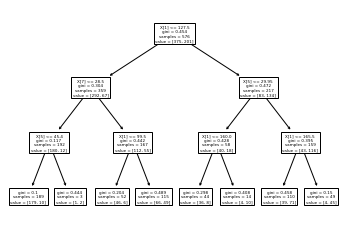

In [54]:
tree.plot_tree(dtf)

In [45]:
x_train.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age'],
      dtype='object')

In [56]:
import numpy as np

In [57]:
n_nodes = dtf.tree_.node_count
children_left = dtf.tree_.children_left
children_right = dtf.tree_.children_right
feature = dtf.tree_.feature
threshold = dtf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 15 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 1] <= 127.5 else to node 8.
	node=1 is a split node: go to node 2 if X[:, 7] <= 28.5 else to node 5.
		node=2 is a split node: go to node 3 if X[:, 5] <= 45.39999961853027 else to node 4.
			node=3 is a leaf node.
			node=4 is a leaf node.
		node=5 is a split node: go to node 6 if X[:, 1] <= 99.5 else to node 7.
			node=6 is a leaf node.
			node=7 is a leaf node.
	node=8 is a split node: go to node 9 if X[:, 5] <= 29.949999809265137 else to node 12.
		node=9 is a split node: go to node 10 if X[:, 1] <= 160.0 else to node 11.
			node=10 is a leaf node.
			node=11 is a leaf node.
		node=12 is a split node: go to node 13 if X[:, 1] <= 165.5 else to node 14.
			node=13 is a leaf node.
			node=14 is a leaf node.
